#### Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import itertools
from pydataset import data

import matplotlib.pyplot as plt
%matplotlib inline

# Exercises

In [84]:
def get_lower_and_upper_bounds(col, k=1.5):
    q1 = col.quantile(0.25)
    q3 = col.quantile(0.75)
    iqr = q3 - q1
    
    lower_fence = q1 - (iqr*k)
    upper_fence = q3 + (iqr*k)
    
    return lower_fence, upper_fence

#### 1. Using lemonade.csv dataset and focusing on continuous variables:

In [2]:
url = 'https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv'


In [3]:
df = pd.read_csv(url)

In [4]:
df.shape

(365, 7)

In [5]:
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         365 non-null    object 
 1   Day          365 non-null    object 
 2   Temperature  365 non-null    float64
 3   Rainfall     365 non-null    float64
 4   Flyers       365 non-null    int64  
 5   Price        365 non-null    float64
 6   Sales        365 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 20.1+ KB


In [7]:
df.describe()

,Temperature,Rainfall,Flyers,Price,Sales
count,365.000000,365.000000,365.000000,365.0,365.000000
mean,61.224658,0.825973,40.104110,0.5,27.865753
std,18.085892,0.273890,13.786445,0.0,30.948132
min,15.100000,0.400000,-38.000000,0.5,7.000000
25%,49.700000,0.650000,31.000000,0.5,20.000000
50%,61.100000,0.740000,39.000000,0.5,25.000000
75%,71.700000,0.910000,49.000000,0.5,30.000000
max,212.000000,2.500000,80.000000,0.5,534.000000


- Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?


In [86]:
for col in df.columns[2:]:
    lower_fence, upper_fence = get_lower_and_upper_bounds(df[col])
    
    print(df[col] [(df[col] < lower_fence)].to_markdown())
    print()

|     |   Temperature |
|----:|--------------:|
| 364 |          15.1 |

| Rainfall   |
|------------|

|     |   Flyers |
|----:|---------:|
| 324 |      -38 |

| Price   |
|---------|

| Sales   |
|---------|



In [87]:
for col in df.columns[2:]:
    lower_fence, upper_fence = get_lower_and_upper_bounds(df[col])
    
    print(df[col] [(df[col] > upper_fence)].to_markdown())
    print()

|    |   Temperature |
|---:|--------------:|
| 41 |           212 |

|     |   Rainfall |
|----:|-----------:|
|   0 |       2    |
|   1 |       1.33 |
|   2 |       1.33 |
|   5 |       1.54 |
|   6 |       1.54 |
|  10 |       1.54 |
|  11 |       1.33 |
|  12 |       1.33 |
|  15 |       1.67 |
|  16 |       1.43 |
|  19 |       1.43 |
|  23 |       1.54 |
|  27 |       1.33 |
|  28 |       1.33 |
| 337 |       1.54 |
| 338 |       1.82 |
| 342 |       1.43 |
| 343 |       1.82 |
| 345 |       1.33 |
| 346 |       1.43 |
| 347 |       1.54 |
| 350 |       1.33 |
| 351 |       1.43 |
| 354 |       1.33 |
| 355 |       1.54 |
| 359 |       1.43 |
| 363 |       1.43 |
| 364 |       2.5  |

|     |   Flyers |
|----:|---------:|
| 166 |       77 |
| 194 |       80 |

| Price   |
|---------|

|     |   Sales |
|----:|--------:|
| 181 |     143 |
| 182 |     158 |
| 183 |     235 |
| 184 |     534 |



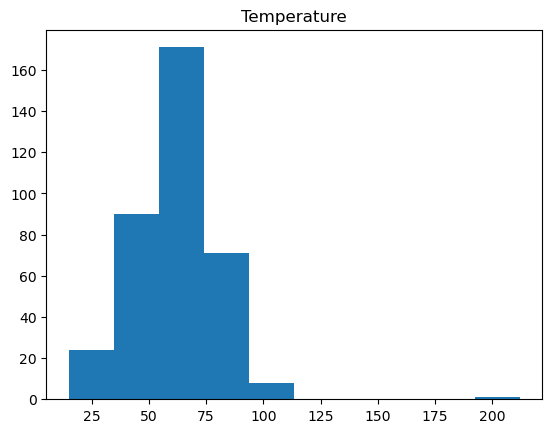

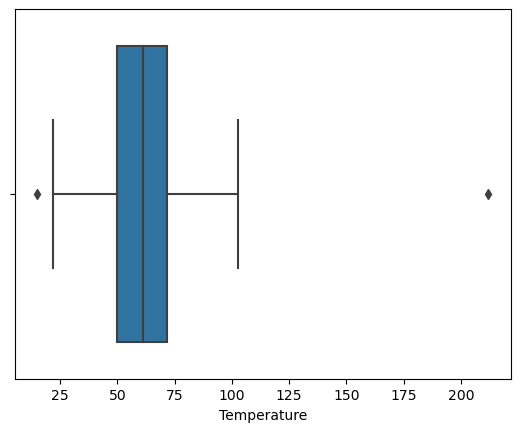

------------


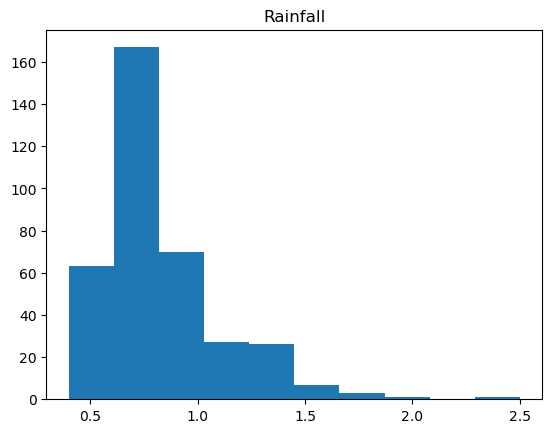

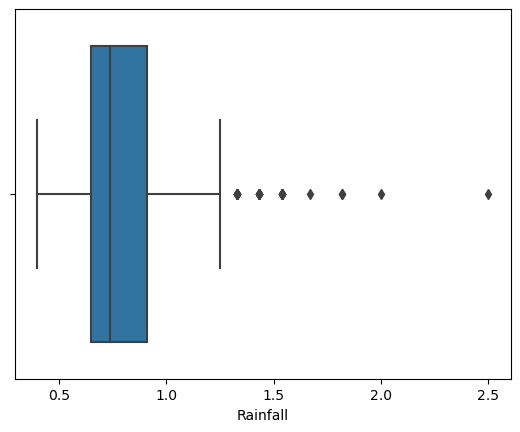

------------


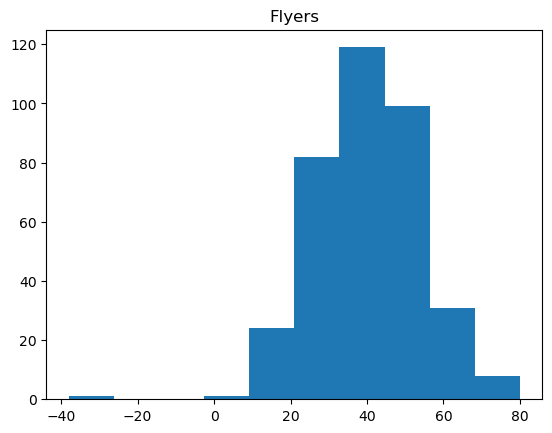

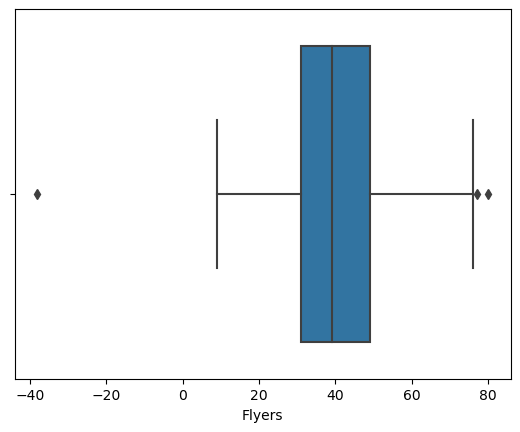

------------


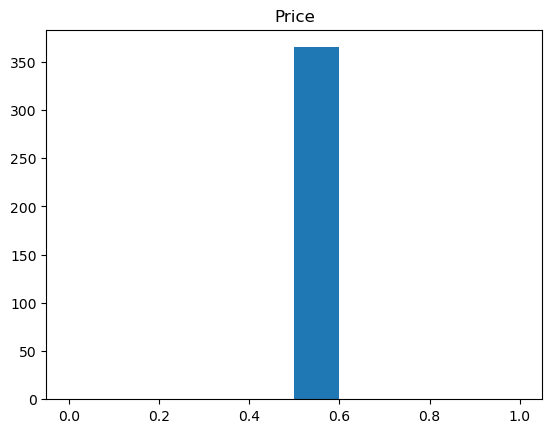

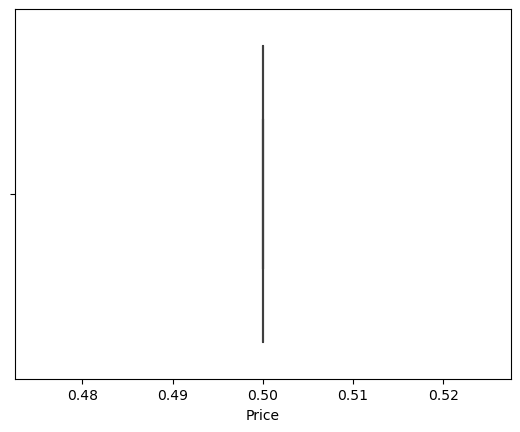

------------


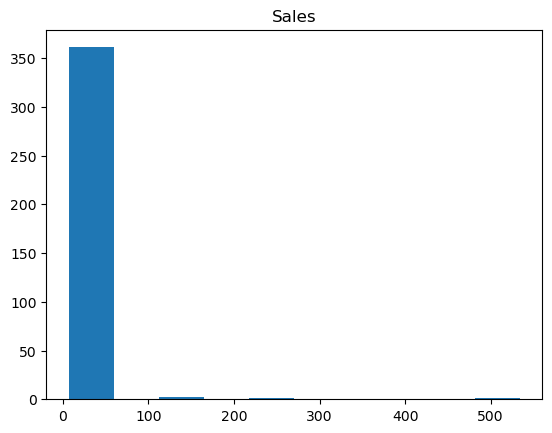

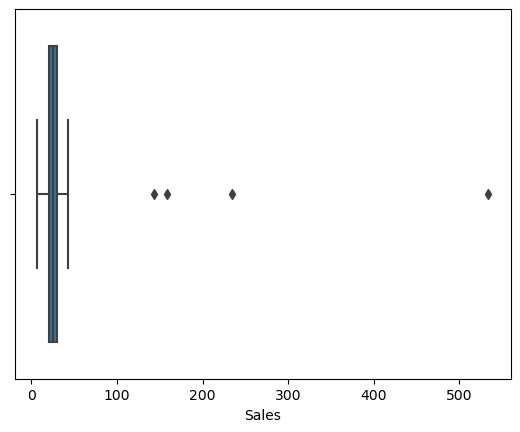

------------


In [83]:
cols = df.columns.to_list()

for col in cols[2:]:
    plt.hist(df[col])
    plt.title(col.capitalize())
    plt.show()
    sns.boxplot(data=df, x=col)
    plt.show()
    print('------------')

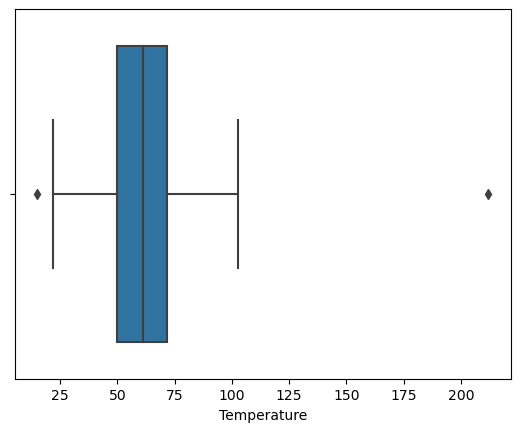

In [89]:
sns.boxplot(data=df, x='Temperature')
plt.show()

In [46]:
def outliers_lower(data, column, multiplier=1.5):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - (multiplier * iqr)
    lower_outliers = data[data[column] < lower]
    
    return lower_outliers

In [47]:
outliers_lower(df, 'Temperature')

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
364,12/31/17,Sunday,15.1,2.5,9,0.5,7


In [38]:
outliers_lower(df, 'Rainfall')

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


In [40]:
outliers_lower(df, 'Flyers')

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
324,11/21/17,Tuesday,47.0,0.95,-38,0.5,20


In [42]:
outliers_lower(df, 'Price')

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


In [44]:
outliers_lower(df, 'Sales')

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


- Use the IQR Range Rule and the upper and upper bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these upper outliers make sense? Which outliers should be kept?


In [48]:
def outliers_upper(data, column, multiplier=1.5):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    upper = q3 + (multiplier * iqr)
    upper_outliers = data[data[column] > upper]
    return upper_outliers

In [49]:
outliers_upper(df, 'Temperature')

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
41,2/11/17,Saturday,212.0,0.91,35,0.5,21


In [39]:
outliers_upper(df, 'Rainfall')

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
5,1/6/17,Friday,25.3,1.54,23,0.5,11
6,1/7/17,Saturday,32.9,1.54,19,0.5,13
10,1/11/17,Wednesday,32.6,1.54,23,0.5,12
11,1/12/17,Thursday,38.2,1.33,16,0.5,14
12,1/13/17,Friday,37.5,1.33,19,0.5,15
15,1/16/17,Monday,30.6,1.67,24,0.5,12
16,1/17/17,Tuesday,32.2,1.43,26,0.5,14


In [41]:
outliers_upper(df, 'Flyers')

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
166,6/16/17,Friday,99.3,0.47,77,0.5,41
194,7/14/17,Friday,92.0,0.50,80,0.5,40


In [43]:
outliers_upper(df, 'Price')

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


In [45]:
outliers_upper(df, 'Sales')

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
181,7/1/17,Saturday,102.9,0.47,59,0.5,143
182,7/2/17,Sunday,93.4,0.51,68,0.5,158
183,7/3/17,Monday,81.5,0.54,68,0.5,235
184,7/4/17,Tuesday,84.2,0.59,49,0.5,534


- Using the multiplier of 3, IQR Range Rule, and the lower bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense? Which outliers should be kept?


In [50]:
outliers_lower(df, 'Temperature', multiplier=3)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


In [51]:
outliers_lower(df, 'Rainfall', multiplier=3)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


In [52]:
outliers_lower(df, 'Flyers', multiplier=3)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
324,11/21/17,Tuesday,47.0,0.95,-38,0.5,20


In [53]:
outliers_lower(df, 'Price', multiplier=3)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


In [54]:
outliers_lower(df, 'Sales', multiplier=3)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


- Using the multiplier of 3, IQR Range Rule, and the upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?

In [55]:
outliers_upper(df, 'Temperature', multiplier=3)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
41,2/11/17,Saturday,212.0,0.91,35,0.5,21


In [56]:
outliers_upper(df, 'Rainfall', multiplier=3)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
338,12/5/17,Tuesday,22.0,1.82,11,0.5,10
343,12/10/17,Sunday,31.3,1.82,15,0.5,11
364,12/31/17,Sunday,15.1,2.50,9,0.5,7


In [57]:
outliers_upper(df, 'Flyers', multiplier=3)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


In [58]:
outliers_upper(df, 'Price', multiplier=3)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


In [59]:
outliers_upper(df, 'Sales', multiplier=3)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
181,7/1/17,Saturday,102.9,0.47,59,0.5,143
182,7/2/17,Sunday,93.4,0.51,68,0.5,158
183,7/3/17,Monday,81.5,0.54,68,0.5,235
184,7/4/17,Tuesday,84.2,0.59,49,0.5,534


#### 2. Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:

- Use a 2 sigma decision rule to isolate the outliers.
    - Do these make sense?
    - Should certain outliers be kept or removed?

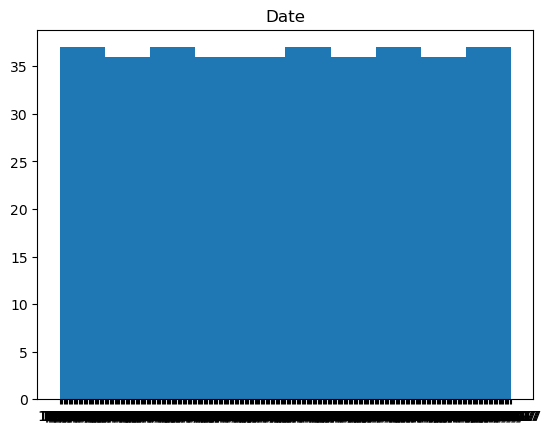

------------


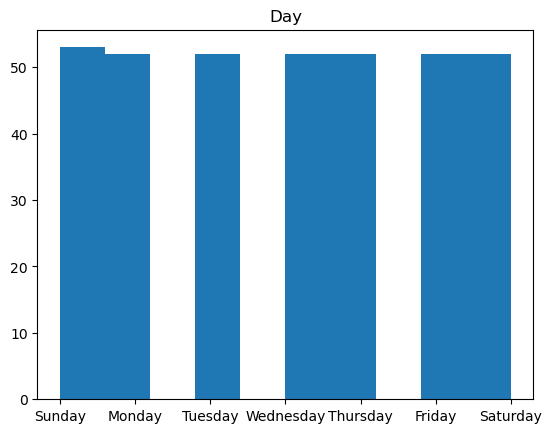

------------


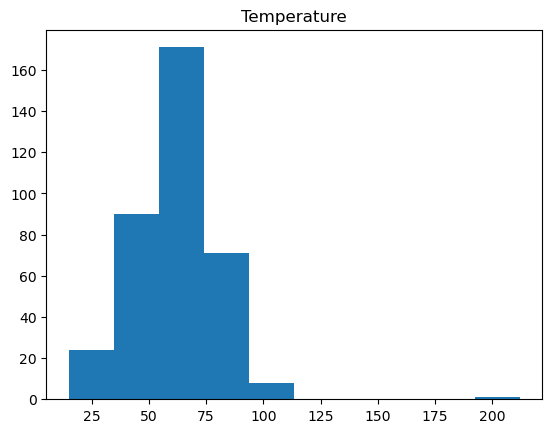

------------


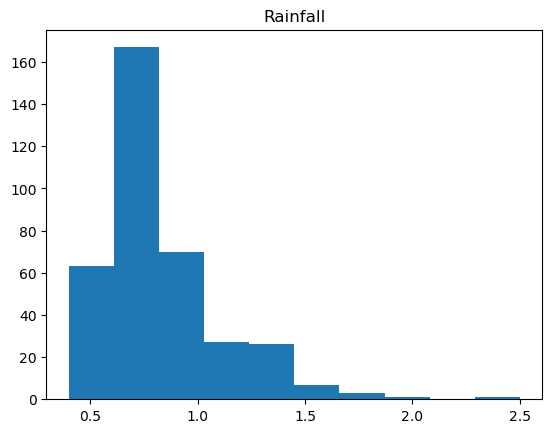

------------


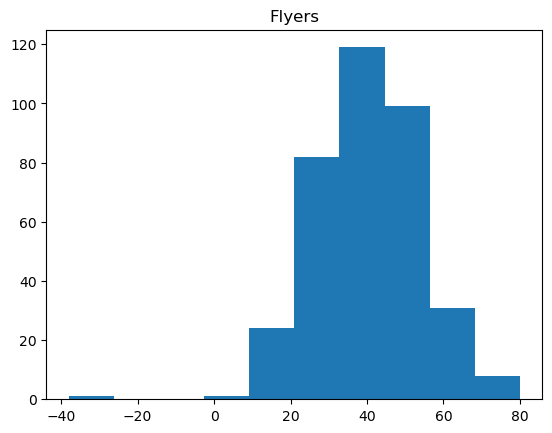

------------


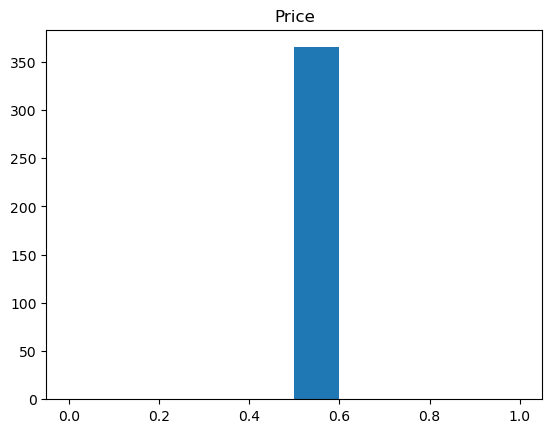

------------


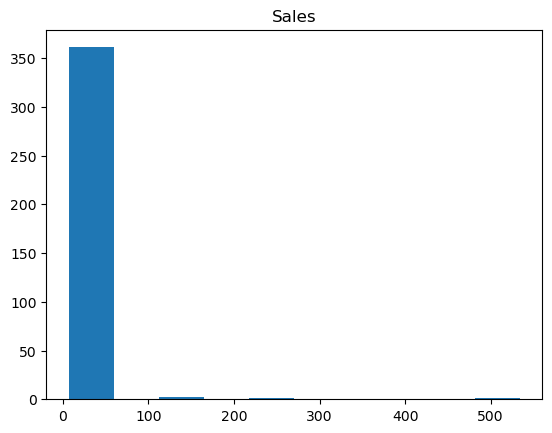

------------


In [60]:
cols = df.columns.to_list()

for col in cols:
    plt.hist(df[col])
    plt.title(col.capitalize())
    plt.show()
    print('------------')

In [74]:
def outliers_2std(df, var):
    mean = df[var].mean()
    std = df[var].std()
    lower_bound = mean - (2 * std)
    upper_bound = mean + (2 * std)
    outliers = df[(df[var] < lower_bound) | (df[var] > upper_bound)]
    return outliers

In [75]:
outliers_2std(df, 'Temperature')

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
41,2/11/17,Saturday,212.0,0.91,35,0.5,21
166,6/16/17,Friday,99.3,0.47,77,0.5,41
176,6/26/17,Monday,102.6,0.47,60,0.5,42
181,7/1/17,Saturday,102.9,0.47,59,0.5,143
190,7/10/17,Monday,98.0,0.49,66,0.5,40
198,7/18/17,Tuesday,99.3,0.47,76,0.5,41
202,7/22/17,Saturday,99.6,0.47,49,0.5,42
207,7/27/17,Thursday,97.9,0.47,74,0.5,43
338,12/5/17,Tuesday,22.0,1.82,11,0.5,10
364,12/31/17,Sunday,15.1,2.50,9,0.5,7


In [76]:
outliers_2std(df, 'Rainfall')

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
5,1/6/17,Friday,25.3,1.54,23,0.5,11
6,1/7/17,Saturday,32.9,1.54,19,0.5,13
10,1/11/17,Wednesday,32.6,1.54,23,0.5,12
15,1/16/17,Monday,30.6,1.67,24,0.5,12
16,1/17/17,Tuesday,32.2,1.43,26,0.5,14
19,1/20/17,Friday,31.6,1.43,20,0.5,12
23,1/24/17,Tuesday,28.6,1.54,20,0.5,12
337,12/4/17,Monday,34.9,1.54,16,0.5,13
338,12/5/17,Tuesday,22.0,1.82,11,0.5,10


In [77]:
outliers_2std(df, 'Flyers')

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
166,6/16/17,Friday,99.3,0.47,77,0.5,41
170,6/20/17,Tuesday,85.1,0.54,70,0.5,37
171,6/21/17,Wednesday,94.3,0.47,76,0.5,41
182,7/2/17,Sunday,93.4,0.51,68,0.5,158
183,7/3/17,Monday,81.5,0.54,68,0.5,235
194,7/14/17,Friday,92.0,0.50,80,0.5,40
198,7/18/17,Tuesday,99.3,0.47,76,0.5,41
203,7/23/17,Sunday,89.1,0.51,72,0.5,37
204,7/24/17,Monday,83.5,0.57,69,0.5,35
207,7/27/17,Thursday,97.9,0.47,74,0.5,43


#### 3. Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv

In [79]:
def outliers_3std(df, var):
    mean = df[var].mean()
    std = df[var].std()
    lower_bound = mean - (3 * std)
    upper_bound = mean + (3 * std)
    outliers = df[(df[var] < lower_bound) | (df[var] > upper_bound)]
    return outliers

In [80]:
outliers_3std(df, 'Temperature')

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
41,2/11/17,Saturday,212.0,0.91,35,0.5,21


In [81]:
outliers_3std(df, 'Rainfall')

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
15,1/16/17,Monday,30.6,1.67,24,0.5,12
338,12/5/17,Tuesday,22.0,1.82,11,0.5,10
343,12/10/17,Sunday,31.3,1.82,15,0.5,11
364,12/31/17,Sunday,15.1,2.50,9,0.5,7


In [82]:
outliers_3std(df, 'Flyers')

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
324,11/21/17,Tuesday,47.0,0.95,-38,0.5,20
